#**Superstore Analytics: Sales, Profit, and Customer Insights 📊**

**Dataset:** Sample Superstore Dataset  
**Goal:** Analyze sales, profit, customer segments, and trends to uncover actionable insights.  
**Tools:** Pandas, NumPy, Matplotlib, Seaborn, Plotly


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import chardet
import warnings
warnings.filterwarnings('ignore')
import plotly.express as px

In [2]:
with open ('/content/Sample - Superstore.csv','rb') as f:
  r=chardet.detect(f.read())
  print(r)


{'encoding': 'Windows-1252', 'confidence': 0.73, 'language': ''}


In [3]:
d=pd.read_csv('/content/Sample - Superstore.csv',encoding='Windows-1252')

**Data Overview**

In [4]:
d.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2016-138688,6/12/2016,6/16/2016,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


In [5]:
d.shape

(9994, 21)

In [6]:
d.isnull().sum()

,0
Row ID,0
Order ID,0
Order Date,0
Ship Date,0
Ship Mode,0
Customer ID,0
Customer Name,0
Segment,0
Country,0
City,0


In [7]:
d.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Row ID         9994 non-null   int64  
 1   Order ID       9994 non-null   object 
 2   Order Date     9994 non-null   object 
 3   Ship Date      9994 non-null   object 
 4   Ship Mode      9994 non-null   object 
 5   Customer ID    9994 non-null   object 
 6   Customer Name  9994 non-null   object 
 7   Segment        9994 non-null   object 
 8   Country        9994 non-null   object 
 9   City           9994 non-null   object 
 10  State          9994 non-null   object 
 11  Postal Code    9994 non-null   int64  
 12  Region         9994 non-null   object 
 13  Product ID     9994 non-null   object 
 14  Category       9994 non-null   object 
 15  Sub-Category   9994 non-null   object 
 16  Product Name   9994 non-null   object 
 17  Sales          9994 non-null   float64
 18  Quantity

In [8]:
d.duplicated().sum()

np.int64(0)

In [9]:
d.columns

Index(['Row ID', 'Order ID', 'Order Date', 'Ship Date', 'Ship Mode',
       'Customer ID', 'Customer Name', 'Segment', 'Country', 'City', 'State',
       'Postal Code', 'Region', 'Product ID', 'Category', 'Sub-Category',
       'Product Name', 'Sales', 'Quantity', 'Discount', 'Profit'],
      dtype='object')

**Exploratory Data Analysis**

Identifying which category has the more profit

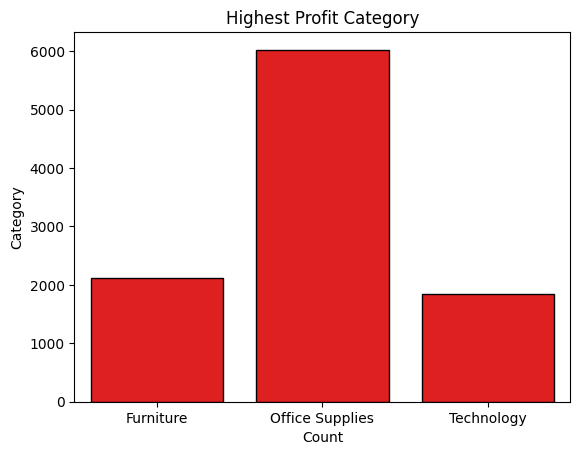

In [45]:
sns.countplot(data=d,x='Category',color='red',edgecolor='black')
plt.xlabel('Count')
plt.ylabel('Category')
plt.title('Highest Profit Category')
plt.show()

Region vs Segmentwise Profitable

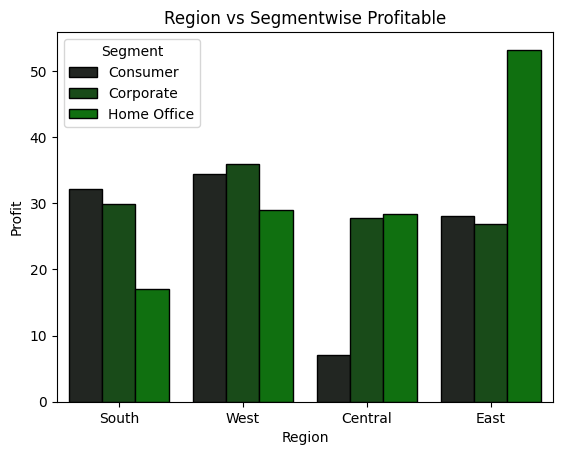

In [44]:
sns.barplot(data=d,x='Region',y=d['Profit'],hue='Segment',color='green',edgecolor='black',ci=None)
plt.title('Region vs Segmentwise Profitable')
plt.xlabel('Region')
plt.ylabel('Profit')
plt.show()

Profit and Sales show positive trends; Quantity and Discount relationships vary by Category

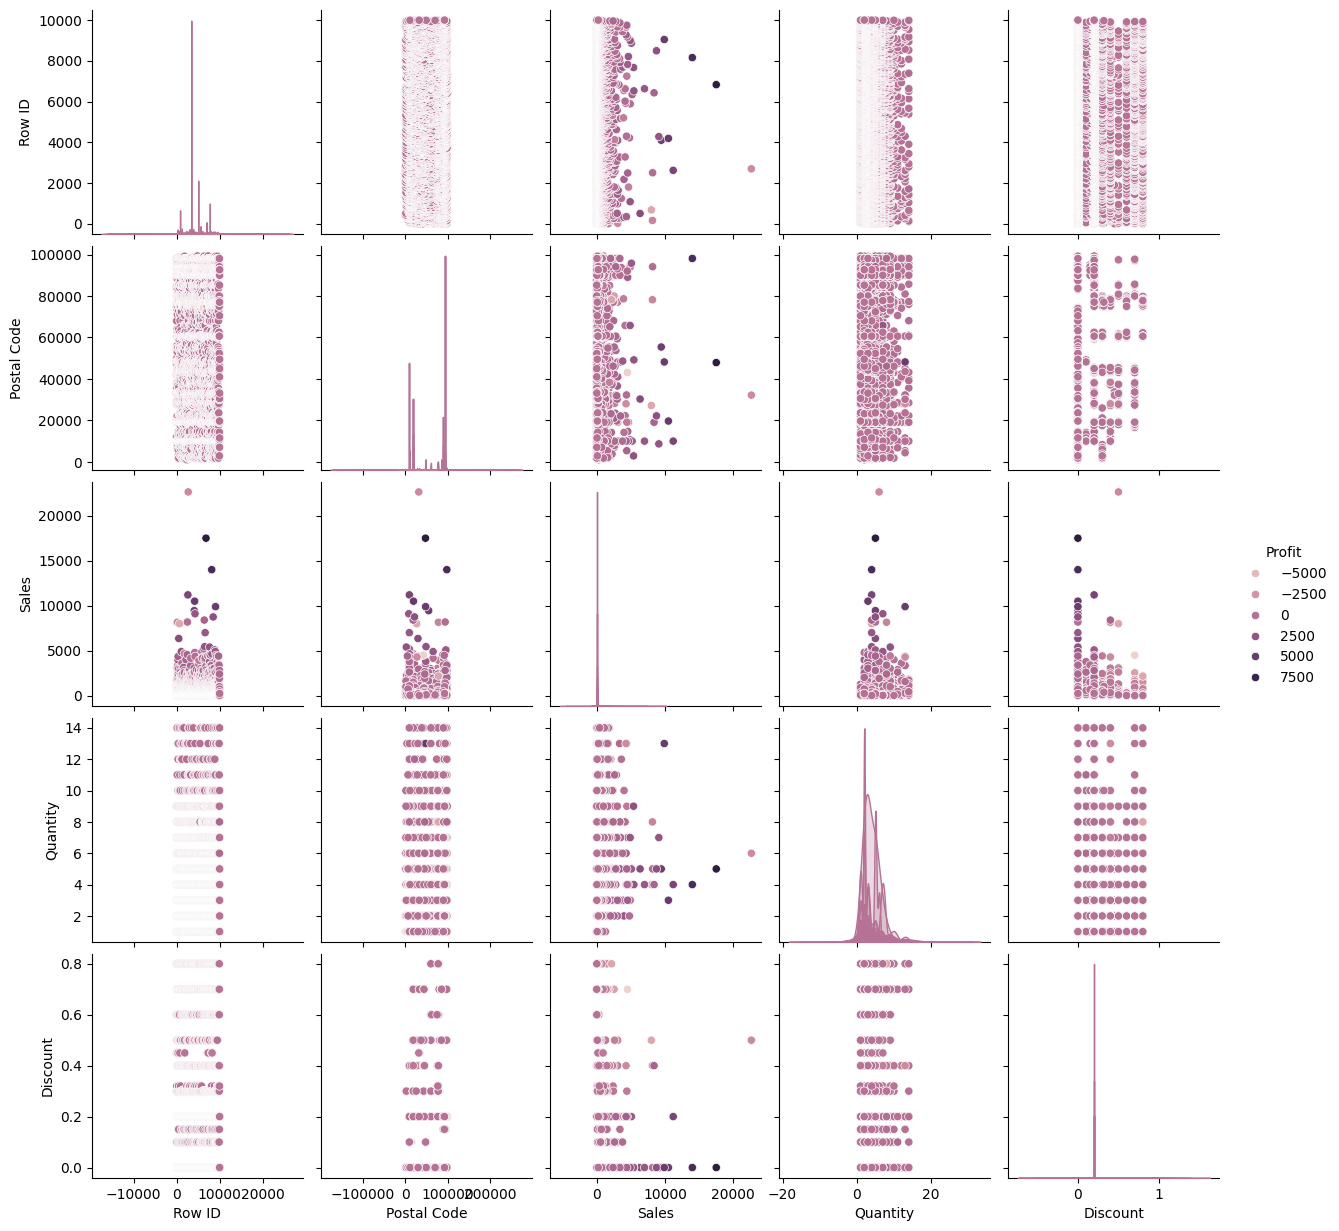

In [43]:
sns.pairplot(d,hue='Profit')
plt.show()

Identified high-profit products and correlation between Sales and Profit.

In [38]:
import plotly.express as px
fig = px.scatter(d,
                 x='Sales',
                 y='Profit',
                 color='Category',
                 hover_data=['Region', 'Segment'],
                 title='Sales vs Profit')
fig.show()


Detected extreme profits and see distribution shape.

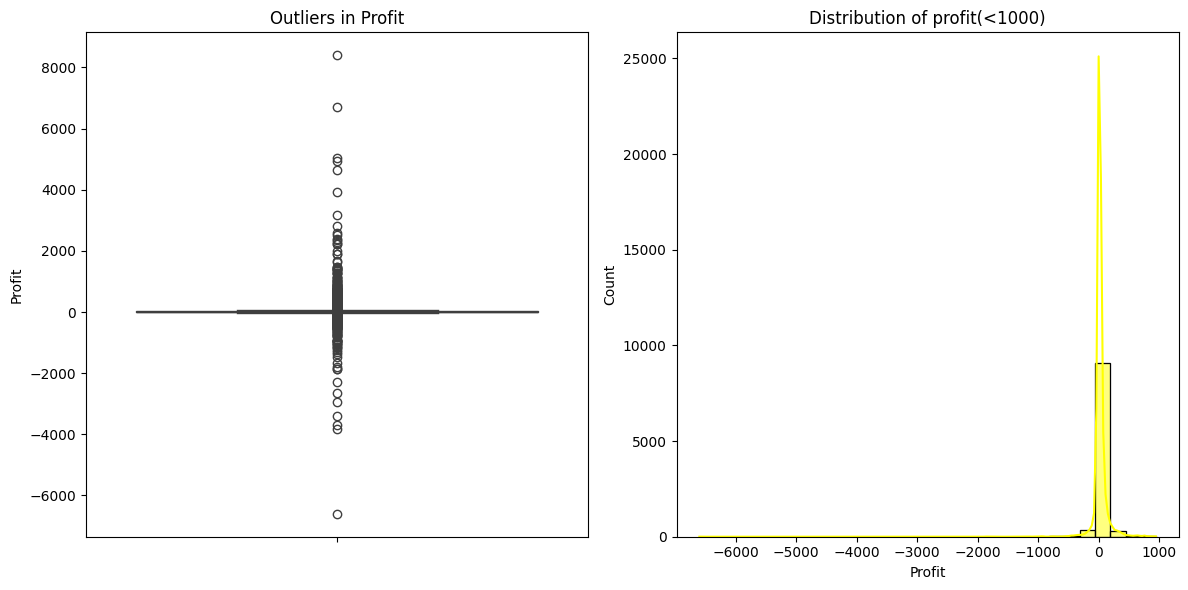

In [14]:
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
sns.boxplot(d['Profit'])
plt.title('Outliers in Profit')

plt.subplot(1,2,2)
sns.histplot(d[d['Profit'] < 1000]['Profit'],kde=True,color='yellow',bins=30)
plt.title("Distribution of profit(<1000)")

plt.tight_layout()
plt.show()

Profit positively correlates with Sales; negatively correlates with Discount.

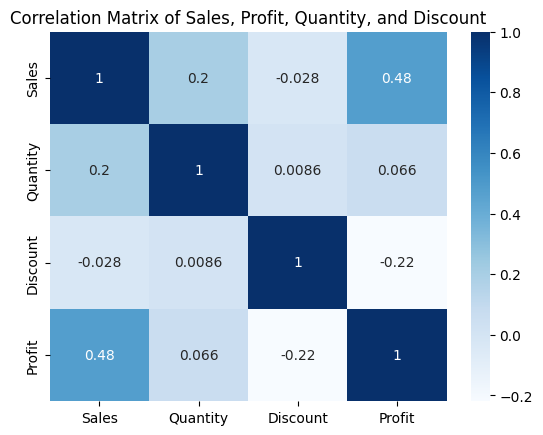

In [15]:
cr=d[['Sales', 'Quantity', 'Discount', 'Profit']].corr()
sns.heatmap(data=cr,annot=True,cmap='Blues')
plt.title('Correlation Matrix of Sales, Profit, Quantity, and Discount')
plt.show()

Consumer segment drives most sales per category.

In [16]:
fig = px.bar(
    d,
    x='Category',
    y='Sales',
    color='Segment',
    barmode='group',
    color_discrete_map={'Consumer':'#FF5733', 'Corporate':'#33FF57', 'Home Office':'#3357FF'},
    title='Sales by Category and Segment'
)
fig.show()

Observe peak sales months and overall trends.

In [41]:
d['Order Date'] = pd.to_datetime(d['Order Date'])
d['Month'] = d['Order Date'].dt.to_period('M')
monthly_sales = d.groupby('Month')['Sales'].sum().reset_index()
monthly_sales['Month'] = monthly_sales['Month'].astype(str)

fig = px.line(
    monthly_sales,
    x='Month',
    y='Sales',
    markers=True,
    title='📈 Monthly Sales Trend',
    labels={'Sales':'Total Sales', 'Month':'Month'}
)
fig.update_traces(marker=dict(size=10, color='red'))  # bigger red markers
fig.show()


#**Overall Insights 📊**





Category: Technology has the most orders; Office Supplies and Furniture contribute moderately.

Region & Segment: Consumer segment drives most sales; East region is most profitable.

Sales vs Profit: High sales don’t always mean high profit; some high-sale products have low margins.

Profit Distribution: Most profits are under 1000; few high-profit outliers exist.

Correlation: Profit ↑ with Sales ✅, Profit ↓ with Discount ❌.

Monthly Trend: Sales peak in November–December; mid-year growth observed.

# ***CONCLUSION***

1.The Superstore dataset reveals key patterns in sales, profit, and customer behavior.

2.Technology products and Consumer segment are critical revenue drivers, and East region is most profitable.

3.Seasonal trends indicate peak sales in November–December, which can guide inventory planning and promotions.

4.Discounts should be managed carefully, as excessive discounts negatively impact profit.




